In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd

In [215]:
sber_data = pd.read_csv('data/sber_data.csv')

In [216]:
len(sber_data['sub_area'].unique())

146

In [217]:
sber_data['price_doc'].describe()

count    3.047100e+04
mean     7.123035e+06
std      4.780111e+06
min      1.000000e+05
25%      4.740002e+06
50%      6.274411e+06
75%      8.300000e+06
max      1.111111e+08
Name: price_doc, dtype: float64

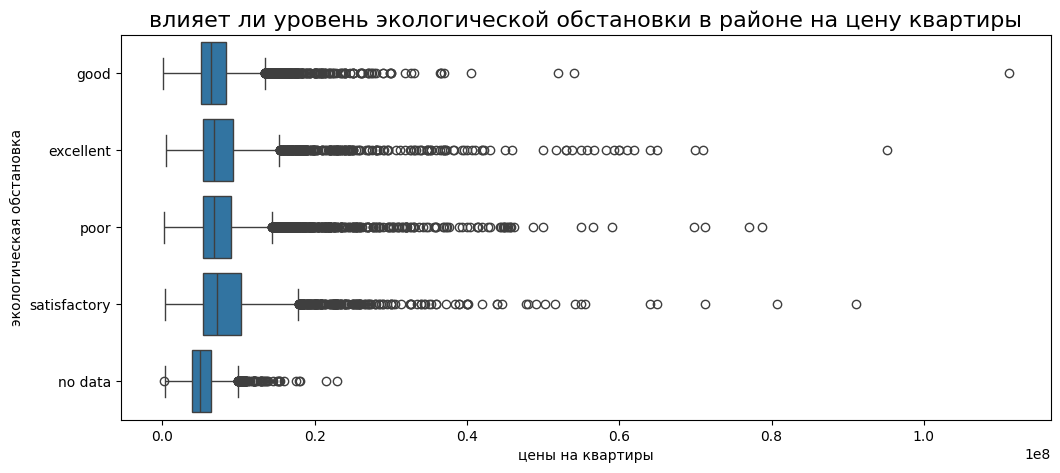

In [218]:
fig = plt.figure(figsize=(12, 5))
boxplot = sns.boxplot(
    sber_data, 
    x='price_doc', 
    y='ecology'
)
boxplot.set_title('влияет ли уровень экологической обстановки в районе на цену квартиры', fontsize=16)
boxplot.set_xlabel('цены на квартиры')
boxplot.set_ylabel('экологическая обстановка');

In [219]:
sber_data['ecology'].unique()

array(['good', 'excellent', 'poor', 'satisfactory', 'no data'],
      dtype=object)

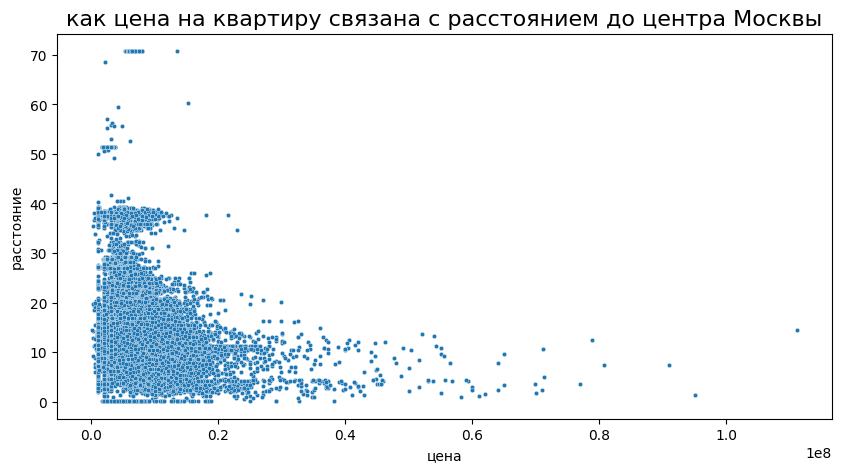

In [220]:
fig = plt.figure(figsize=(10, 5))

scatterplot = sns.scatterplot(
    data=sber_data,
    x='price_doc', 
    y='kremlin_km', 
    s=10,
    sizes=(50, 300)

)
scatterplot.set_title('как цена на квартиру связана с расстоянием до центра Москвы', fontsize=16)
scatterplot.set_xlabel('цена')
scatterplot.set_ylabel('расстояние');

In [221]:
display(sber_data.isnull().tail())

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
30466,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30467,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30468,False,False,True,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
30469,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30470,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Доля пропусков по столбцам

In [222]:
cols_null_percent = sber_data.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null)

hospital_beds_raion          47.392603
preschool_quota              21.948738
school_quota                 21.938893
life_sq                      20.947786
floor                         0.548062
metro_min_walk                0.082045
metro_km_walk                 0.082045
railroad_station_walk_km      0.082045
railroad_station_walk_min     0.082045
dtype: float64

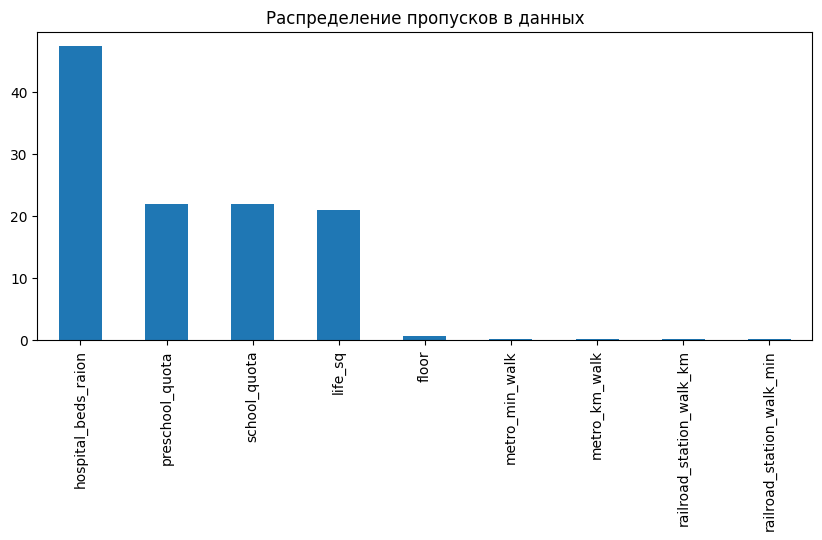

In [223]:
cols_with_null.plot(
    kind='bar',
    figsize=(10, 4),
    title='Распределение пропусков в данных'
);

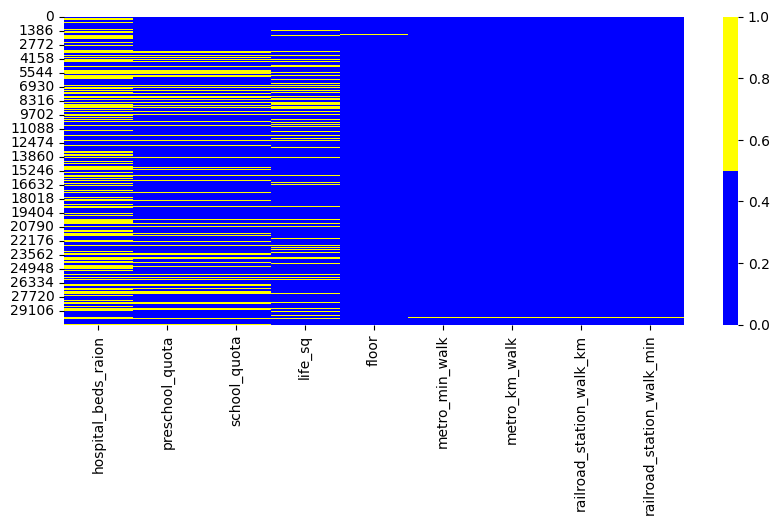

In [224]:
colors = ['blue', 'yellow'] 
fig = plt.figure(figsize=(10, 4))
cols = cols_with_null.index
ax = sns.heatmap(
    sber_data[cols].isnull(),
    cmap=sns.color_palette(colors),
)

In [225]:
#создаем копию исходной таблицы
drop_data = sber_data.copy()
#задаем минимальный порог: вычисляем 70% от числа строк
thresh = drop_data.shape[0]*0.7
#удаляем столбцы, в которых более 30% (100-70) пропусков
drop_data = drop_data.dropna(thresh=thresh, axis=1)
#удаляем записи, в которых есть хотя бы 1 пропуск
drop_data = drop_data.dropna(how='any', axis=0)
#отображаем результирующую долю пропусков
drop_data.isnull().mean()

id                                       0.0
full_sq                                  0.0
life_sq                                  0.0
floor                                    0.0
sub_area                                 0.0
preschool_quota                          0.0
preschool_education_centers_raion        0.0
school_quota                             0.0
school_education_centers_raion           0.0
school_education_centers_top_20_raion    0.0
healthcare_centers_raion                 0.0
university_top_20_raion                  0.0
sport_objects_raion                      0.0
additional_education_raion               0.0
culture_objects_top_25_raion             0.0
shopping_centers_raion                   0.0
office_raion                             0.0
oil_chemistry_raion                      0.0
railroad_terminal_raion                  0.0
nuclear_reactor_raion                    0.0
metro_min_avto                           0.0
metro_km_avto                            0.0
metro_min_

In [226]:
display(thresh)

21329.699999999997

In [227]:
print(drop_data.shape)

(20888, 60)


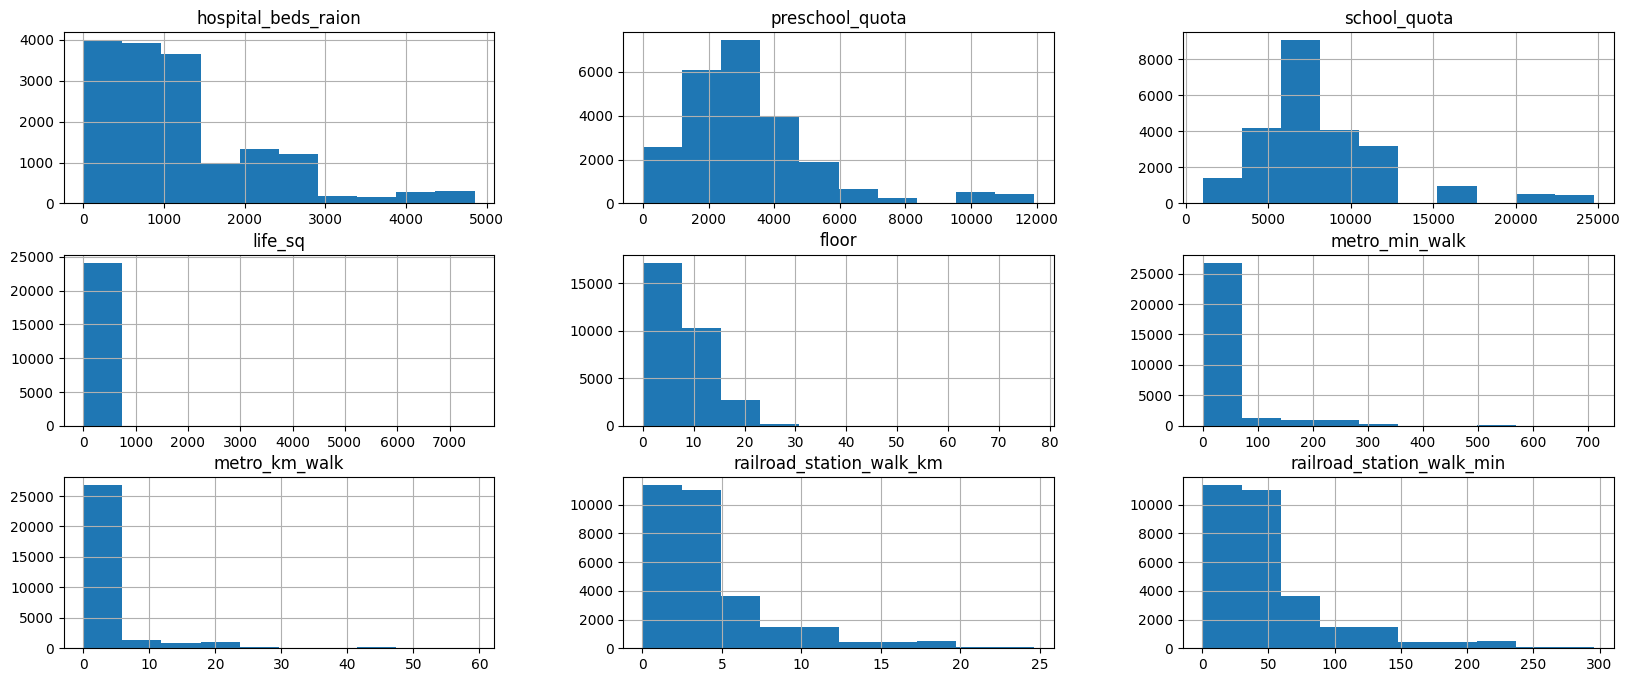

In [228]:
cols = cols_with_null.index
sber_data[cols].hist(figsize=(20, 8));

In [229]:
display(cols)

Index(['hospital_beds_raion', 'preschool_quota', 'school_quota', 'life_sq',
       'floor', 'metro_min_walk', 'metro_km_walk', 'railroad_station_walk_km',
       'railroad_station_walk_min'],
      dtype='object')

In [230]:
#создаём копию исходной таблицы
combine_data = sber_data.copy()

#отбрасываем столбцы с числом пропусков более 30% (100-70)
n = combine_data.shape[0] #число строк в таблице
thresh = n*0.7
combine_data = combine_data.dropna(thresh=thresh, axis=1)

#отбрасываем строки с числом пропусков более 2 в строке
m = combine_data.shape[1] #число признаков после удаления столбцов
combine_data = combine_data.dropna(thresh=m-2, axis=0)

#создаём словарь 'имя_столбца': число (признак), на который надо заменить пропуски 
values = {
    'life_sq': combine_data['full_sq'],
    'metro_min_walk': combine_data['metro_min_walk'].median(),
    'metro_km_walk': combine_data['metro_km_walk'].median(),
    'railroad_station_walk_km': combine_data['railroad_station_walk_km'].median(),
    'railroad_station_walk_min': combine_data['railroad_station_walk_min'].median(),
    'preschool_quota': combine_data['preschool_quota'].mode()[0],
    'school_quota': combine_data['school_quota'].mode()[0],
    'floor': combine_data['floor'].mode()[0]
}
#заполняем оставшиеся записи константами в соответствии со словарем values
combine_data = combine_data.fillna(values)
#выводим результирующую долю пропусков
display(combine_data.isnull().mean())

id                                       0.0
full_sq                                  0.0
life_sq                                  0.0
floor                                    0.0
sub_area                                 0.0
preschool_quota                          0.0
preschool_education_centers_raion        0.0
school_quota                             0.0
school_education_centers_raion           0.0
school_education_centers_top_20_raion    0.0
healthcare_centers_raion                 0.0
university_top_20_raion                  0.0
sport_objects_raion                      0.0
additional_education_raion               0.0
culture_objects_top_25_raion             0.0
shopping_centers_raion                   0.0
office_raion                             0.0
oil_chemistry_raion                      0.0
railroad_terminal_raion                  0.0
nuclear_reactor_raion                    0.0
metro_min_avto                           0.0
metro_km_avto                            0.0
metro_min_

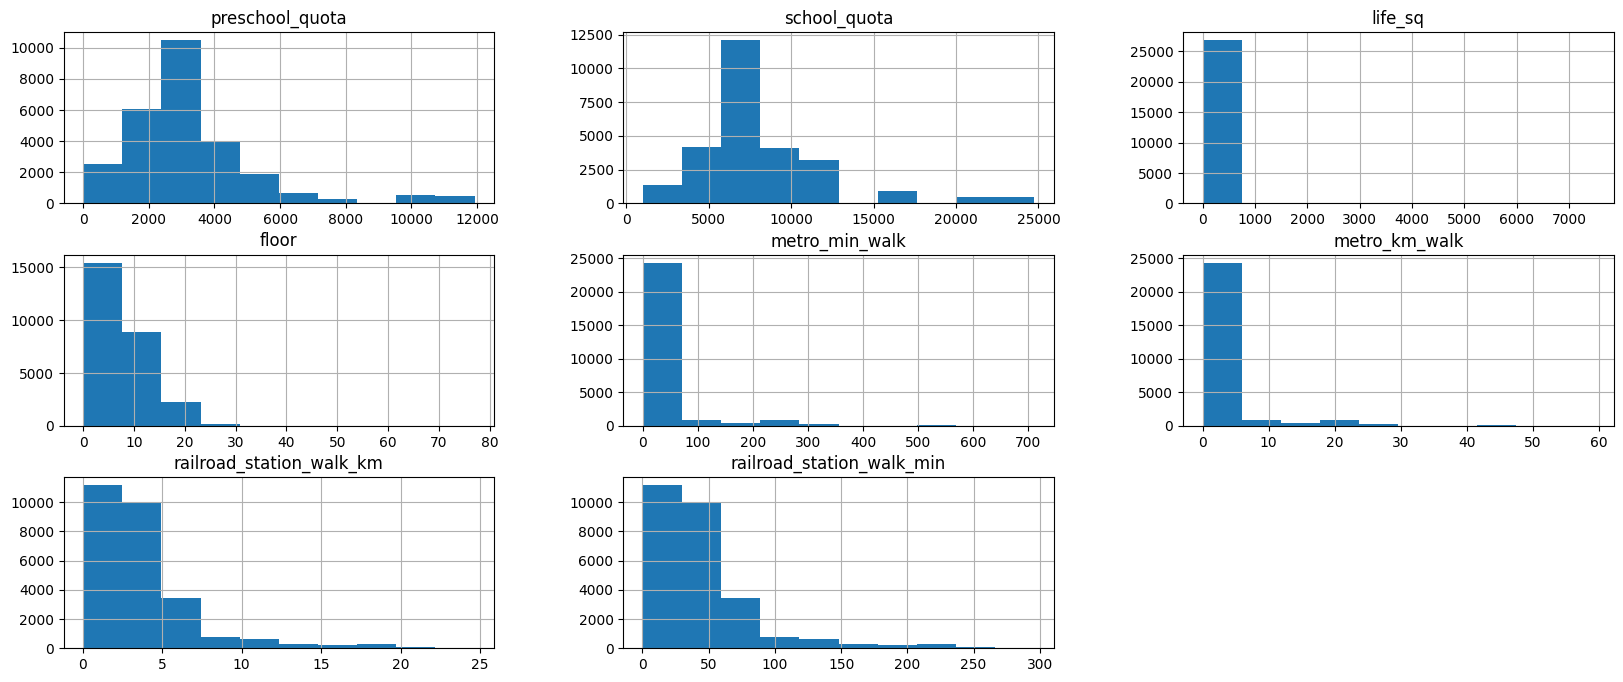

In [231]:
combine_data[cols[1:]].hist(figsize=(20, 8));

In [232]:
sber_data['life_sq'].describe()

count    24088.000000
mean        34.403271
std         52.285733
min          0.000000
25%         20.000000
50%         30.000000
75%         43.000000
max       7478.000000
Name: life_sq, dtype: float64

In [233]:
print(sber_data[sber_data['life_sq'] == 0].shape[0])

45


In [234]:
display(sber_data[sber_data['life_sq'] > 7000])

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
13546,13549,79,7478.0,8.0,Poselenie Voskresenskoe,NaN,0,NaN,0,0,...,5.072389,1.210613,0.826052,1.582378,0.756119,21.472421,14.917332,no data,0,7705000


In [235]:
outliers = sber_data[sber_data['life_sq'] > sber_data['full_sq']]
print(outliers.shape[0])

37


In [236]:
cleaned = sber_data.drop(outliers.index, axis=0)
print(f'Результирующее число записей: {cleaned.shape[0]}')

Результирующее число записей: 30434


In [237]:
display(sber_data['floor'].describe())

count    30304.000000
mean         7.670803
std          5.319989
min          0.000000
25%          3.000000
50%          6.500000
75%         11.000000
max         77.000000
Name: floor, dtype: float64

In [238]:
display(sber_data[sber_data['floor']> 50])

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
23584,23587,57,33.0,77.0,Lomonosovskoe,3091.0,5,8359.0,7,1,...,0.310557,0.731683,0.489763,0.86354,0.863266,2.920671,2.757058,satisfactory,0,13700000


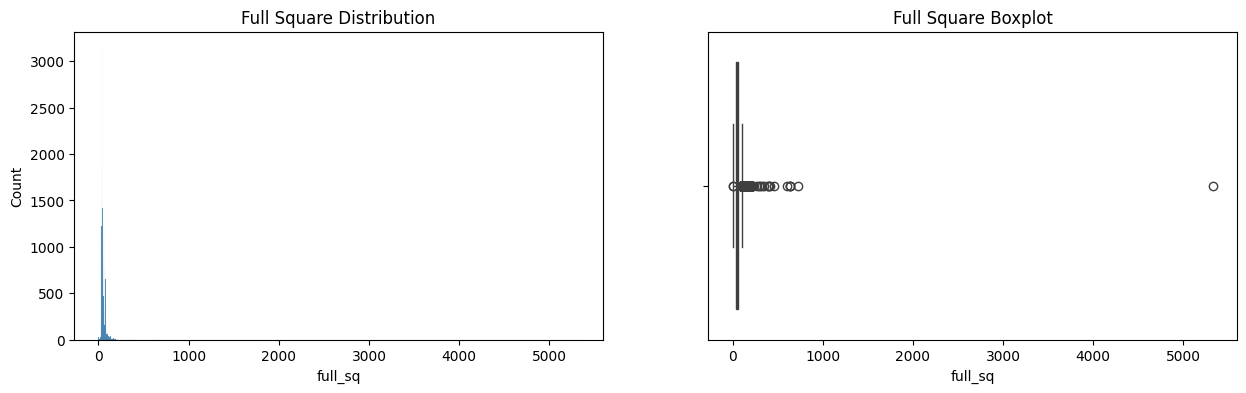

In [239]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=sber_data, x='full_sq', ax=axes[0]);
histplot.set_title('Full Square Distribution');
boxplot = sns.boxplot(data=sber_data, x='full_sq', ax=axes[1]);
boxplot.set_title('Full Square Boxplot');

In [240]:
"""функция принимает на вход DataFrame и признак, по которому ищутся 
выбросы, а затем возвращает потенциальные выбросы, найденные с помощью 
метода Тьюки, и очищенный от них датасет"""

def outliers_iqr(data, feature):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

In [241]:
outliers, cleaned = outliers_iqr(sber_data, 'full_sq')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 963
Результирующее число записей: 29508


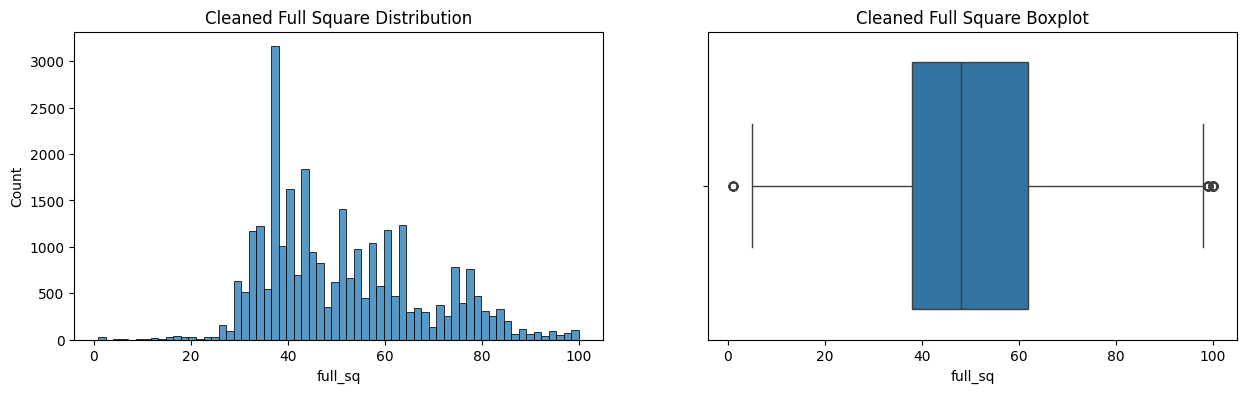

In [242]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=cleaned, x='full_sq', ax=axes[0]);
histplot.set_title('Cleaned Full Square Distribution');
boxplot = sns.boxplot(data=cleaned, x='full_sq', ax=axes[1]);
boxplot.set_title('Cleaned Full Square Boxplot');

In [243]:
def outliers_iqr_mod(data, feature, log_scale = False, left = 1.5, right = 1.5):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

In [244]:
outliers, cleaned = outliers_iqr_mod(sber_data, 'price_doc', True, 3, 3)
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 629
Результирующее число записей: 29842


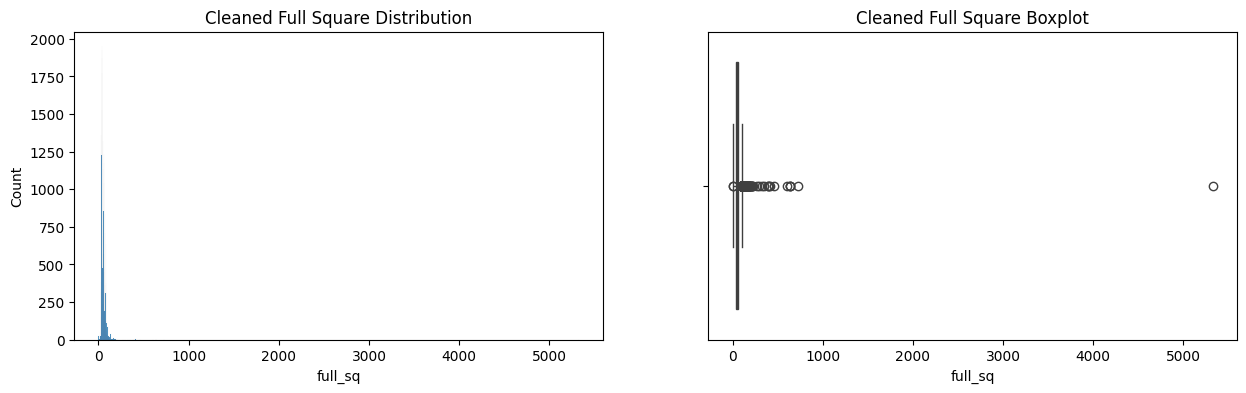

In [245]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=cleaned, x='full_sq', ax=axes[0]);
histplot.set_title('Cleaned Full Square Distribution');
boxplot = sns.boxplot(data=cleaned, x='full_sq', ax=axes[1]);
boxplot.set_title('Cleaned Full Square Boxplot');

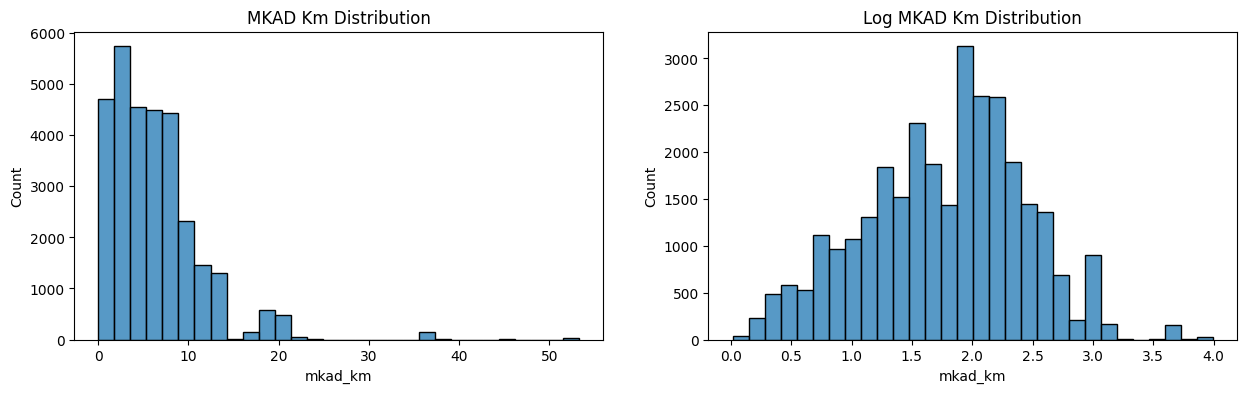

In [246]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

#гистограмма исходного признака
histplot = sns.histplot(sber_data['mkad_km'], bins=30, ax=axes[0])
histplot.set_title('MKAD Km Distribution');

#гистограмма в логарифмическом масштабе
log_mkad_km= np.log(sber_data['mkad_km'] + 1)
histplot = sns.histplot(log_mkad_km , bins=30, ax=axes[1])
histplot.set_title('Log MKAD Km Distribution');

In [247]:
print(log_mkad_km.skew())
# -0.14263612203024953

-0.14263612203024953


In [248]:
def outliers_z_score(data, feature, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 3 * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

In [249]:
outliers, cleaned = outliers_z_score(sber_data, 'mkad_km', log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 33
Результирующее число записей: 30438


In [ ]:
cleaned

In [250]:
print(outliers['sub_area'].unique())

['Poselenie Rogovskoe' 'Poselenie Kievskij']


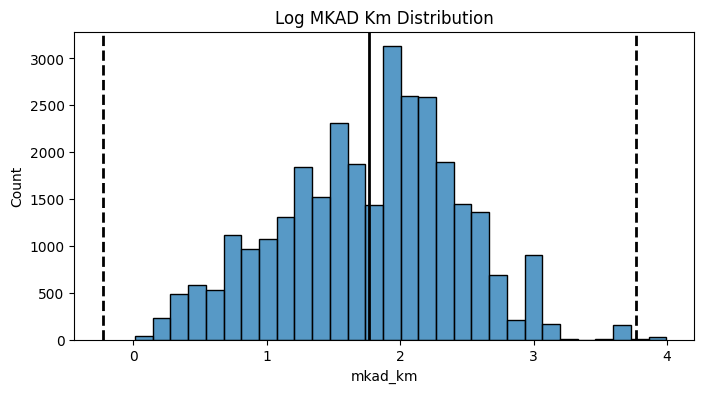

In [251]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
log_mkad_km = np.log(sber_data['mkad_km'] + 1)
histplot = sns.histplot(log_mkad_km, bins=30, ax=ax)
histplot.axvline(log_mkad_km.mean(), color='k', lw=2)
histplot.axvline(log_mkad_km.mean()+ 3 * log_mkad_km.std(), color='k', ls='--', lw=2)
histplot.axvline(log_mkad_km.mean()- 3 * log_mkad_km.std(), color='k', ls='--', lw=2)
histplot.set_title('Log MKAD Km Distribution');

In [252]:
def outliers_z_score_mod(data, feature, log_scale=False, left = 3, right = 3):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

In [253]:
outliers, cleaned = outliers_z_score_mod(sber_data, 'mkad_km', True, 3, 3.5)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 0
Результирующее число записей: 30471


In [254]:
outliers, cleaned = outliers_z_score_mod(sber_data, 'price_doc', True, 3.7, 3.7)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 52
Результирующее число записей: 30419


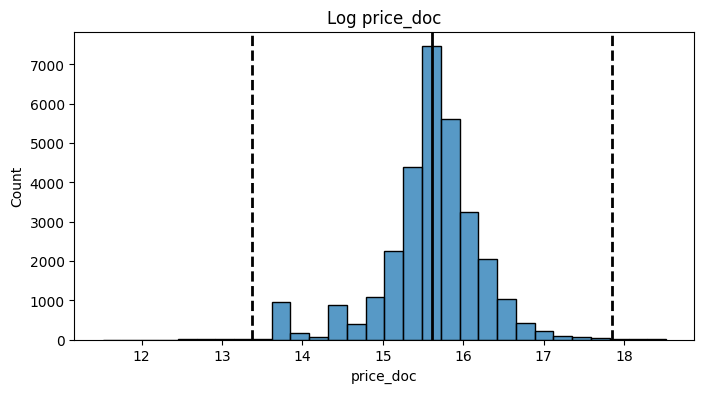

In [255]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
log_price_doc = np.log(sber_data['price_doc'] + 1)
histplot = sns.histplot(log_price_doc, bins=30, ax=ax)
histplot.axvline(log_price_doc.mean(), color='k', lw=2)
histplot.axvline(log_price_doc.mean()+ 3.7 * log_price_doc.std(), color='k', ls='--', lw=2)
histplot.axvline(log_price_doc.mean()- 3.7 * log_price_doc.std(), color='k', ls='--', lw=2)
histplot.set_title('Log price_doc');

In [256]:
def outliers_iqr_mod_log(data, feature, log_scale=False, left = 1.5, right = 1.5):
    if log_scale:
        x = np.log(data[feature])
    else:
        x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

In [257]:
outliers, cleaned = outliers_iqr_mod_log(sber_data, 'price_doc', True, 3 ,3 )
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 92
Результирующее число записей: 30379


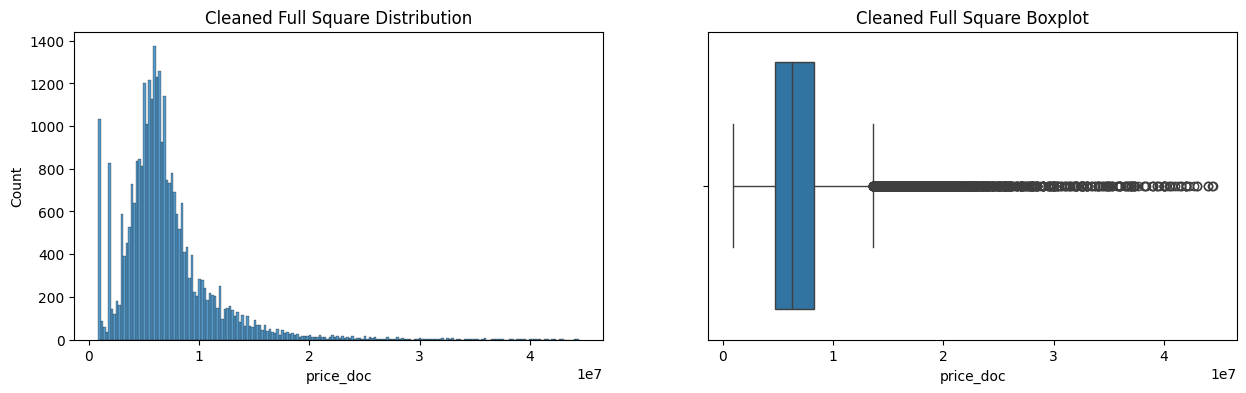

In [258]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=cleaned, x='price_doc', ax=axes[0]);
histplot.set_title('Cleaned Full Square Distribution');
boxplot = sns.boxplot(data=cleaned, x='price_doc', ax=axes[1]);
boxplot.set_title('Cleaned Full Square Boxplot');

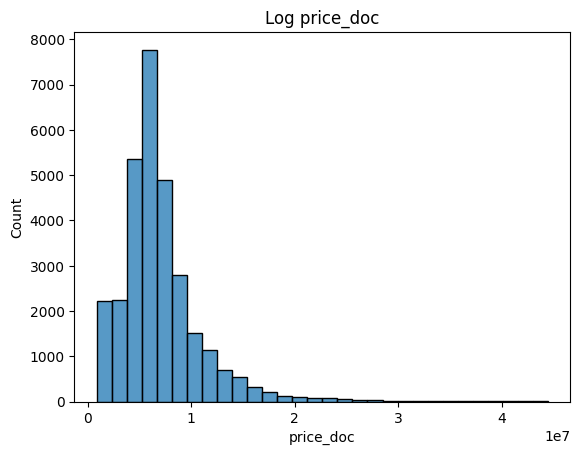

In [259]:
histplot = sns.histplot(cleaned, x='price_doc' , bins=30);
histplot.set_title('Log price_doc');

In [260]:
dupl_columns = list(sber_data.columns)
dupl_columns.remove('id')

mask = sber_data.duplicated(subset=dupl_columns)
sber_duplicates = sber_data[mask]
print(f'Число найденных дубликатов: {sber_duplicates.shape[0]}')

Число найденных дубликатов: 562


In [261]:
sber_dedupped = sber_data.drop_duplicates(subset=dupl_columns)
print(f'Результирующее число записей: {sber_dedupped.shape[0]}')

Результирующее число записей: 29909


In [262]:
sber_dedupped['oil_chemistry_raion'].value_counts(normalize=True)

oil_chemistry_raion
no     0.990204
yes    0.009796
Name: proportion, dtype: float64

In [263]:
sber_dedupped['oil_chemistry_raion'].nunique()

2

In [264]:
sber_dedupped['oil_chemistry_raion'].count()

29909

In [265]:
#список неинформативных признаков
low_information_cols = [] 

#цикл по всем столбцам
for col in sber_data.columns:
    #наибольшая относительная частота в признаке
    top_freq = sber_data[col].value_counts(normalize=True).max()
    #доля уникальных значений от размера признака
    nunique_ratio = sber_data[col].nunique() / sber_data[col].count()
    # сравниваем наибольшую частоту с порогом
    if top_freq > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(top_freq*100, 2)}% одинаковых значений')
    # сравниваем долю уникальных значений с порогом
    if nunique_ratio > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(nunique_ratio*100, 2)}% уникальных значений')

id: 100.0% уникальных значений
oil_chemistry_raion: 99.03% одинаковых значений
railroad_terminal_raion: 96.27% одинаковых значений
nuclear_reactor_raion: 97.17% одинаковых значений


big_road1_1line: 97.44% одинаковых значений
mosque_count_1000: 98.08% одинаковых значений


In [266]:
information_sber_data = sber_data.drop(low_information_cols, axis=1)
print(f'Результирующее число признаков: {information_sber_data.shape[1]}')

Результирующее число признаков: 55


In [267]:
diabetes = pd.read_csv('data/diabetes_data.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gender
0,6,98,58,33,190,34.0,0.430,43,0,Female
1,2,112,75,32,0,35.7,0.148,21,0,Female
2,2,108,64,0,0,30.8,0.158,21,0,Female
3,8,107,80,0,0,24.6,0.856,34,0,Female
4,7,136,90,0,0,29.9,0.210,50,0,Female


In [268]:
mask = diabetes.duplicated()
diabetes_duplicates = diabetes[mask]
print(f'Число найденных дубликатов: {diabetes_duplicates.shape[0]}')

Число найденных дубликатов: 10


In [269]:
diabetes_duplicates = diabetes.drop_duplicates()
print(f'Результирующее число записей: {diabetes_duplicates.shape[0]}')

Результирующее число записей: 768


In [270]:
def get_non_informative_signs(data, threshold_top_freq, threshold_unique_ratio):
    #список неинформативных признаков
    low_information_cols = [] 

    #цикл по всем столбцам
    for col in data.columns:
        #наибольшая относительная частота в признаке
        top_freq = data[col].value_counts(normalize=True).max()
        #доля уникальных значений от размера признака
        nunique_ratio = data[col].nunique() / data[col].count()
        # сравниваем наибольшую частоту с порогом
        if top_freq > threshold_top_freq:
            low_information_cols.append(col)
            print(f'{col}: {round(top_freq*100, 2)}% одинаковых значений')
        # сравниваем долю уникальных значений с порогом
        if nunique_ratio > threshold_unique_ratio:
            low_information_cols.append(col)
            print(f'{col}: {round(nunique_ratio*100, 2)}% уникальных значений')
    return low_information_cols

In [271]:
low_information_cols = get_non_informative_signs(diabetes_duplicates, 0.95, 0.95)

Gender: 100.0% одинаковых значений


In [272]:
print(low_information_cols)

['Gender']


In [273]:
information_diabetes_duplicates = diabetes_duplicates.drop(low_information_cols, axis=1)
print(f'Результирующее число признаков: {information_diabetes_duplicates.shape[1]}')

Результирующее число признаков: 9


In [280]:
df = information_diabetes_duplicates.copy()
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[columns_to_replace] = df[columns_to_replace].replace(0, np.nan)


In [281]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 60.0 KB


In [282]:
display(df)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98.0,58.0,33.0,190.0,34.0,0.430,43,0
1,2,112.0,75.0,32.0,NaN,35.7,0.148,21,0
2,2,108.0,64.0,NaN,NaN,30.8,0.158,21,0
3,8,107.0,80.0,NaN,NaN,24.6,0.856,34,0
4,7,136.0,90.0,NaN,NaN,29.9,0.210,50,0
...,...,...,...,...,...,...,...,...,...
763,5,139.0,64.0,35.0,140.0,28.6,0.411,26,0
764,1,96.0,122.0,NaN,NaN,22.4,0.207,27,0
765,10,101.0,86.0,37.0,NaN,45.6,1.136,38,1
766,0,141.0,NaN,NaN,NaN,42.4,0.205,29,1


In [283]:
cols_null_percent = df.isnull().mean()
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null)

Insulin          0.486979
SkinThickness    0.295573
BloodPressure    0.045573
BMI              0.014323
Glucose          0.006510
dtype: float64

In [284]:
thresh = df.shape[0]*0.7
#удаляем столбцы, в которых более 30% (100-70) пропусков
df = df.dropna(thresh=thresh, axis=1)

In [288]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 761 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               761 non-null    int64  
 1   Glucose                   756 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   BMI                       757 non-null    float64
 5   DiabetesPedigreeFunction  761 non-null    float64
 6   Age                       761 non-null    int64  
 7   Outcome                   761 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 53.5 KB


In [287]:
m = df.shape[1] #число признаков после удаления столбцов
df = df.dropna(thresh=m-2, axis=0)

In [289]:
df_filled = df.fillna(df.median())

In [290]:
df_filled['SkinThickness'].mean()

29.109067017082786

In [291]:
def outliers_iqr_mod_log(data, feature, log_scale=False, left = 1.5, right = 1.5):
    if log_scale:
        x = np.log(data[feature])
    else:
        x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

In [292]:
outliers, cleaned = outliers_iqr_mod_log(df_filled, 'SkinThickness', False, 1.5 , 1.5 )
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 87
Результирующее число записей: 674


In [293]:
def outliers_z_score_mod(data, feature, log_scale=False, left = 3, right = 3):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

In [294]:
outliers, cleaned = outliers_z_score_mod(df_filled, 'SkinThickness', False, 3 , 3 )
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 4
Результирующее число записей: 757


In [297]:
outliers, cleaned = outliers_iqr_mod_log(df_filled, 'DiabetesPedigreeFunction', False, 1.5 , 1.5 )
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 29
Результирующее число записей: 732


In [298]:
outliers, cleaned = outliers_iqr_mod_log(df_filled, 'DiabetesPedigreeFunction', True, 1.5 , 1.5 )
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 0
Результирующее число записей: 761
